# 🚀 Loan Data Analysis & Credit Risk Insights  

## 📌 1️⃣ Introduction  
**Objective:** Analyze loan applicant data to understand approval patterns, income impact, and interest rate distribution.  
**Key Questions:**  
- What factors influence loan approvals?  
- How does income affect loan amounts?  
- What is the distribution of interest rates?  

**Tools:** Python, Pandas, Seaborn, Matplotlib  

---
## 📊 2️⃣ Data Insights  
- **Loan Amount & Interest Rate**: Loans within a range; varying interest rates.  
- **Income vs. Loan Amount**: Higher incomes, larger loans.  
- **Loan Approval vs. Rejection**: Analyzed approval rates.  
- **Employment Length & Loan Amount**: Longer employment, higher loans.
 

---

In [1]:
%store -r df_processed


First, we examine the general structure of the data.
This helps us understand the range, mean, and distribution of numerical variables.

In [2]:
df_processed.info()  # Check column types and missing values
df_processed.describe().round(2)  # Summary statistics for numerical features


<class 'pandas.core.frame.DataFrame'>
Index: 32087 entries, 1 to 32580
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   person_age                   32087 non-null  int64   
 1   person_income                32087 non-null  int64   
 2   person_emp_length            32087 non-null  float64 
 3   loan_amnt                    32087 non-null  int64   
 4   loan_int_rate                32087 non-null  float64 
 5   loan_status                  32087 non-null  int64   
 6   loan_percent_income          32087 non-null  float64 
 7   cb_person_cred_hist_length   32087 non-null  int64   
 8   person_home_ownership_OTHER  32087 non-null  bool    
 9   person_home_ownership_OWN    32087 non-null  bool    
 10  person_home_ownership_RENT   32087 non-null  bool    
 11  loan_intent_EDUCATION        32087 non-null  bool    
 12  loan_intent_HOMEIMPROVEMENT  32087 non-null  bool    
 13  loan_i

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32087.00,32087.00,32087.00,32087.00,32087.00,32087.00,32087.00,32087.00
mean,27.68,62723.12,4.74,9511.93,11.01,0.22,0.17,5.78
std,6.18,34339.58,3.97,6227.70,3.08,0.41,0.11,4.04
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.01,2.00
25%,23.00,38400.00,2.00,5000.00,8.49,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,78000.00,7.00,12000.00,13.11,0.00,0.23,8.00
max,94.00,225000.00,41.00,35000.00,23.22,1.00,0.83,30.00


## 📊 Loan Amount Distribution
Histogram: Loan amount
This histogram shows how loan amounts are distributed. If we see a right-skewed distribution, it means more people take smaller loans, while fewer take large loans.

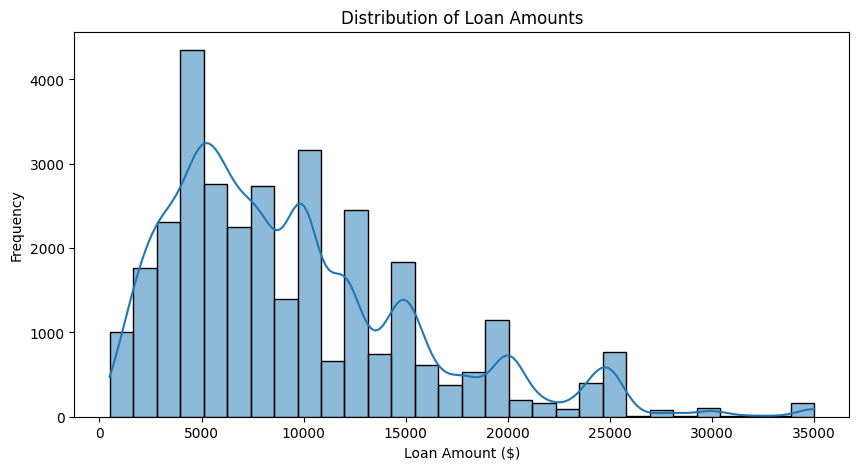

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df_processed["loan_amnt"], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Frequency")
plt.show()


## 📊 Loan Interest Rates

This graph helps us see if interest rates are normally distributed or if some borrowers get significantly lower or higher rates than others.

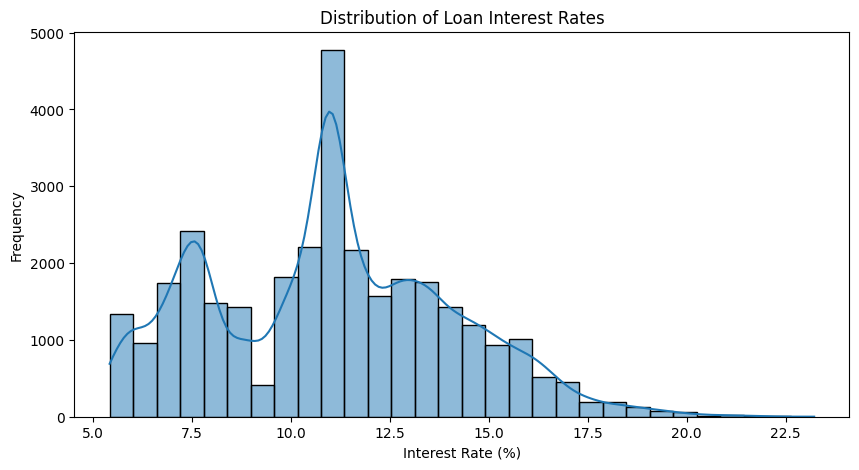

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df_processed['loan_int_rate'], bins=30, kde=True)
plt.title("Distribution of Loan Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()



## 📊 Relationship Between Income and Loan Amount


This visualization shows whether higher income borrowers take larger loans. If we see a strong upward trend, it indicates loan amounts depend on income

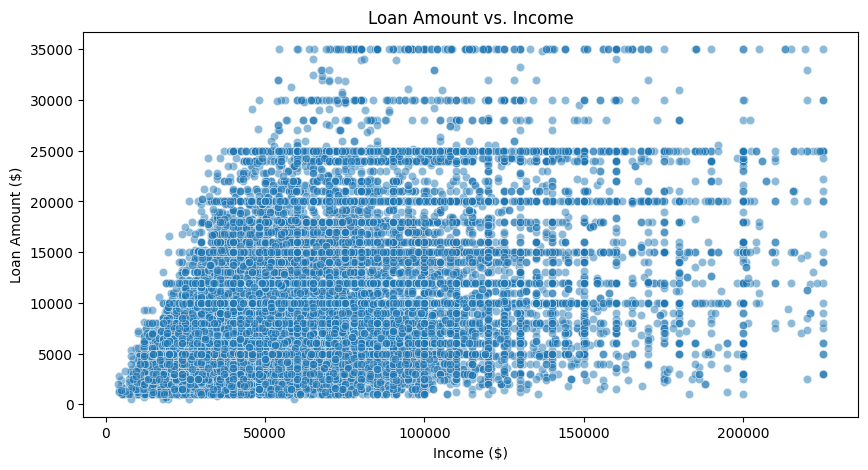

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_processed["person_income"], y=df_processed["loan_amnt"], alpha=0.5)
plt.title("Loan Amount vs. Income")
plt.xlabel("Income ($)")
plt.ylabel("Loan Amount ($)")
plt.show()


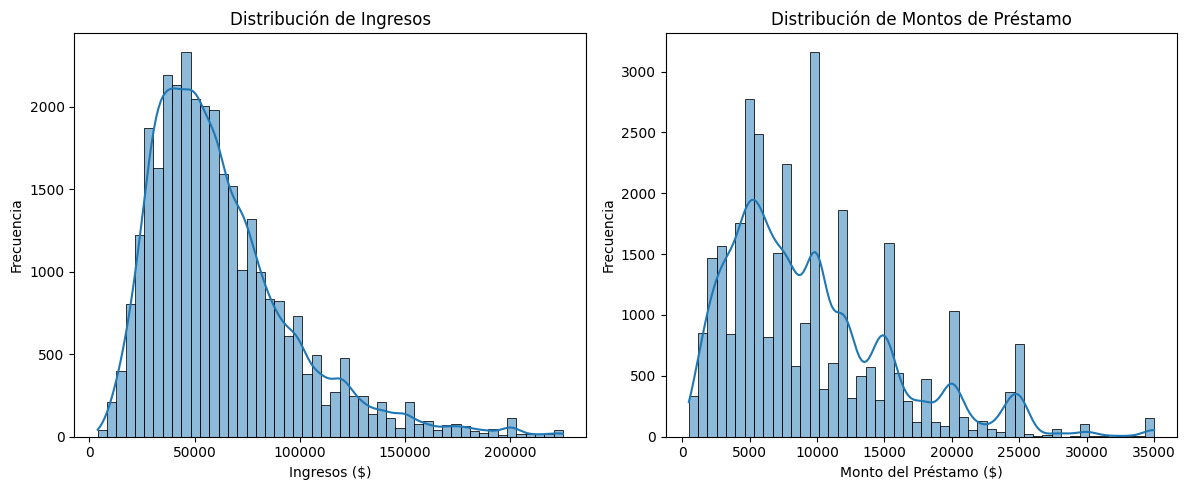

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que los datos están en un DataFrame llamado df
plt.figure(figsize=(12, 5))

# Histograma de ingresos
plt.subplot(1, 2, 1)
sns.histplot(df_processed['person_income'], bins=50, kde=True)
plt.xlabel('Ingresos ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ingresos')

# Histograma de montos de préstamo
plt.subplot(1, 2, 2)
sns.histplot(df_processed['loan_amnt'], bins=50, kde=True)
plt.xlabel('Monto del Préstamo ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Montos de Préstamo')

plt.tight_layout()
plt.show()


## 📊 Loan Approval Rate
If we have a binary loan status (loan_status: 0 = rejected, 1 = approved), we can analyze approval rates.

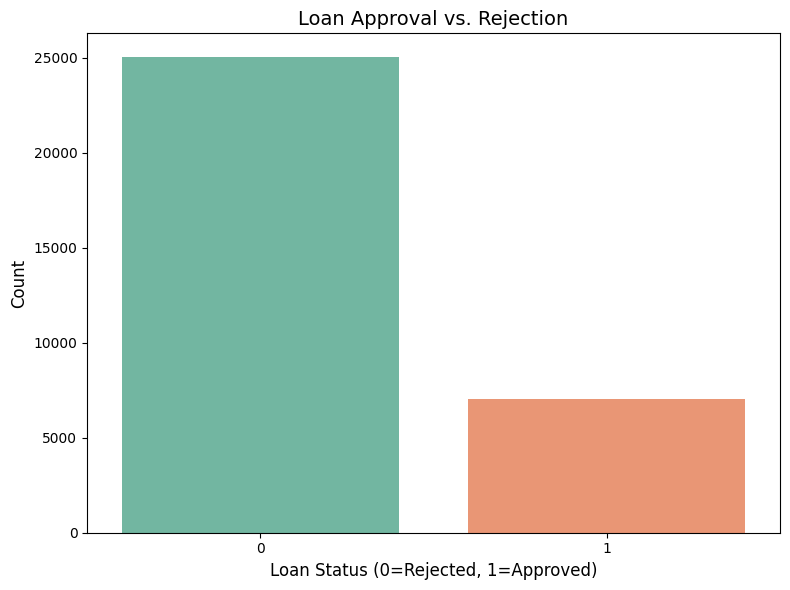

In [8]:
plt.figure(figsize=(8,6))  # Aumento del tamaño para mejorar la visualización
sns.countplot(x=df_processed["loan_status"], hue=df_processed["loan_status"], palette="Set2", legend=False)  # Asignamos hue y desactivamos leyenda

# Título y etiquetas
plt.title("Loan Approval vs. Rejection", fontsize=14)
plt.xlabel("Loan Status (0=Rejected, 1=Approved)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Mejoras en el eje X si es necesario (si las etiquetas se superponen o no son legibles)
plt.xticks(rotation=0)  # Mantén las etiquetas horizontales para mayor claridad

# Ajustar distribución para evitar cortes en la imagen
plt.tight_layout()

# Mostrar gráfico
plt.show()


## 📊 Employment Length vs. Loan Amount
Boxplot: Does Job Experience Affect Loan Amount?

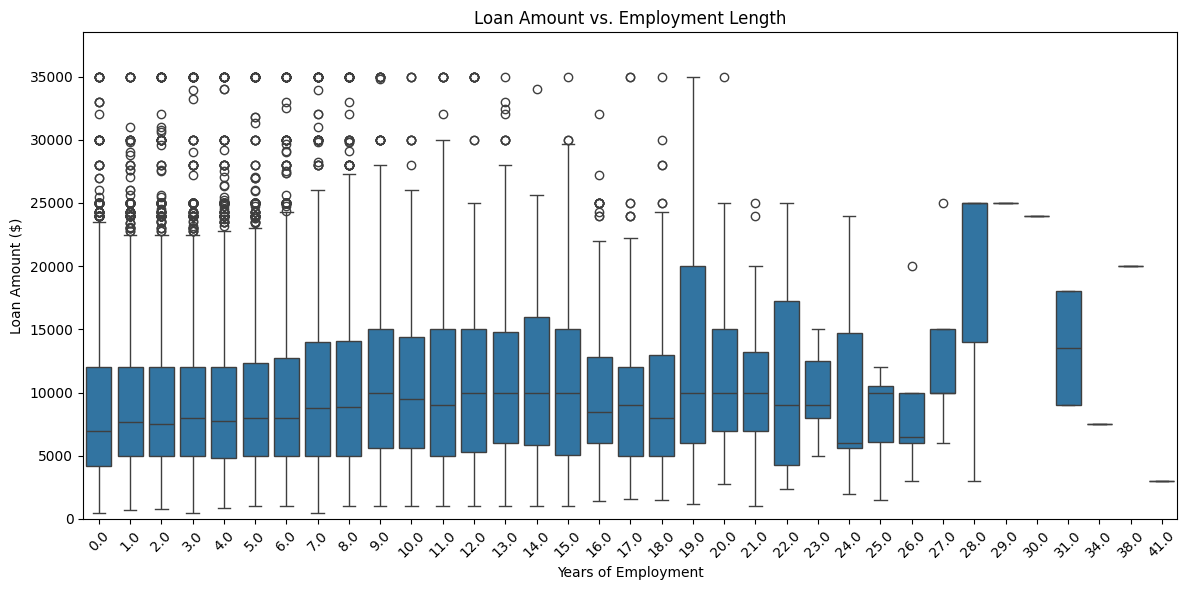

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar que los datos sean numéricos
df_processed["loan_amnt"] = pd.to_numeric(df_processed["loan_amnt"], errors="coerce")

# Configuración del gráfico
plt.figure(figsize=(12,6))  # Aumenta el tamaño para evitar superposición
sns.boxplot(x=df_processed["person_emp_length"], y=df_processed["loan_amnt"])

# Etiquetas y título
plt.title("Loan Amount vs. Employment Length")
plt.xlabel("Years of Employment")
plt.ylabel("Loan Amount ($)")

# Mejoras en el eje X
plt.xticks(rotation=45)  # Rota etiquetas para mayor legibilidad

# Ajuste del eje Y (opcional, si los datos están desbalanceados)
plt.ylim(0, df_processed["loan_amnt"].max() * 1.1)

# Ajustar distribución para evitar cortes en la imagen
plt.tight_layout()

# Mostrar gráfico
plt.show()
